In [1]:
import pandas as pd
births = pd.read_csv('births.csv')
births.head()   #其中births表示这一天的出生人数

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [3]:
#用数据透视表来查看不同年代，男女的出生人数
births['decade'] = 10* (births['year']//10)
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

Text(0, 0.5, 'total births per year')

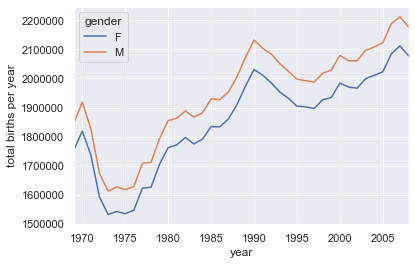

In [5]:
#可以用图像来表示
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year')

Text(0, 0.5, 'mean births by day')

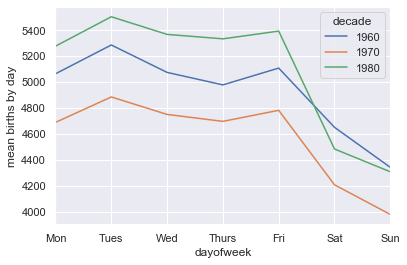

In [7]:
#按照正态分布标准差，划定范围消除异常数据
import numpy as np
quartiles = np.percentile(births['births'],[25,50,75])
mu = quartiles[1]  #均值
sig = 0.74 * (quartiles[2]-quartiles[0])  #标准差，0.74是标准正态分布分位数间距
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
#从年月日中创建一个日期索引
births.index = pd.to_datetime(10000 * births.year+
                             100*births.month+
                             births.day,format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

#利用索引画出不同年代不同星期的出生数据
import matplotlib as mpl
births.pivot_table('births',index='dayofweek',
                  columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])  #设置横轴标签
plt.ylabel('mean births by day')

In [8]:
#还可以画出各个年份平均每天的出生人数
births_by_day = births.pivot_table('births',[births.index.month,births.index.day])
births_by_day.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [9]:
births_by_day.index = [pd.datetime(2012,month,day)
                      for (month,day) in births_by_day.index]
births_by_day.head()

births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625

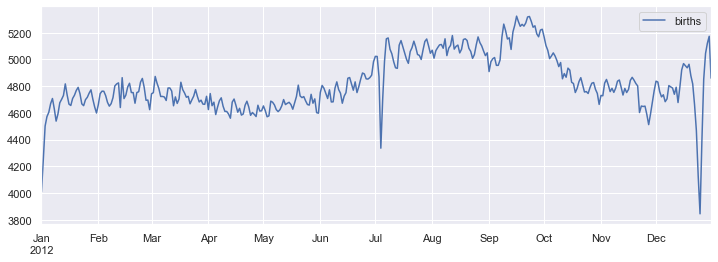

In [13]:
#将结果画成图
fig,ax = plt.subplots(figsize=(12,4))
births_by_day.plot(ax = ax);